# Delay Estimation

When receiving a signal, the problem frequently arises that the exact timing of when the signal will arrive is unknown.  There are many reasons this could happen, but some common reasons are that the distance from the transmitter is unknown, the speed of propagation is unknown or varies, or there are other unknown delays in the signal chain such as digital latency. In these cases, it is necessary to estimate the time at which the signal appears. If the signal is known, its start time can be estimated despite the addition of noise from transmission. In order to estimate the time delay, the simplest method is to find the correlation between the observed signal and the delayed ideal signal as a function of the delay. Intuitively, this is a simple as just sliding the desired signal across the observed waveform and finding the two line up best. Mathematically, our observation can be described as:
$$v(t) = u(t-\tau) + w(t)$$
where $u(t-\tau)$ is our delayed signal and $w(t)$ is noise. The maximum likelihood estimate for $\tau$ is:
$$\hat{\tau}_{ML} = argmin_\tau\ \int_{T_{obs}} [v(t) - u(t-\tau)]^2 dt$$
Expanding this square gives
    $$\hat{\tau}_{ML} = argmin_\tau\ \int_{T_{obs}}v^2(t)\ dt - 2\int_{T_{obs}} v(t)u(t-\tau) \ dt + \int_{T_{obs}} u^2(t-\tau)\ dt$$
    
Maximizing the value of the center term minimizes the value overall. This term just so happens to be the cross correlation between the ideal signal and the observation. The equation can then be re-written as
$$ \hat{\tau}_{ML} = argmax_\tau \int_{T_{obs}} v(t)u(t-\tau)\ dt$$

In this assignment, this calculation is performed on a window of observed data that is known to contain a given signal sampled at $fs = 50Hz$. The beginning of the signal in the observation is estimated to be located at sample 133, making $\hat{\tau}_{ML} = 2.66 s$. The results are observed visually in the time domain (Figure 2), and time-frequency domain (Figures 3-4), and show that ML Estimation has in fact found what appears to be the correct estimate.

In [4]:
pkg load signal

In [3]:
load("hwk6.mat")
fs = 50;
who

Variables in the current scope:

ans  fs   g    v



In [6]:
[cor, lags] = xcorr(g, v);
[maxcor, index] = max(cor)
lag = abs(lags(index))
tlag = lag / fs

maxcor =  439.95
index =  1070
lag =  133
tlag =  2.6600


Peak of correlation is index

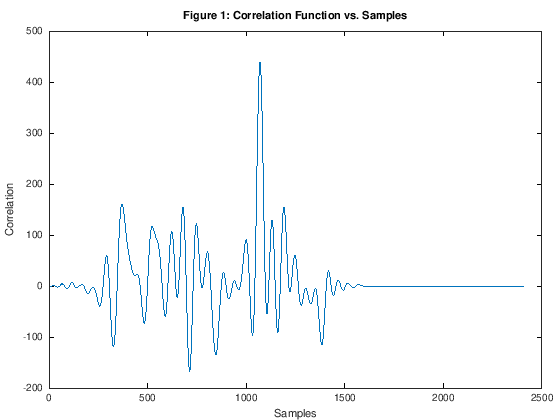

In [25]:
plot(cor)
xlabel("Samples")
ylabel("Correlation")
title("Figure 1: Correlation Function vs. Samples")

Plotting g vs. the delayed signal, v(t-lag) seems to show a good correlation, indicating that this method is working.

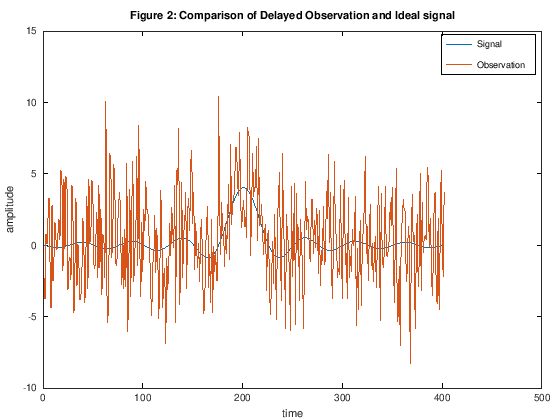

In [14]:
plot(g, 'DisplayName', 'Signal')
hold on
plot(v(lag:lag+length(g)), 'DisplayName', 'Observation')
xlabel("time")
ylabel("amplitude")
title("Figure 2: Comparison of Delayed Observation and Ideal signal")
legend

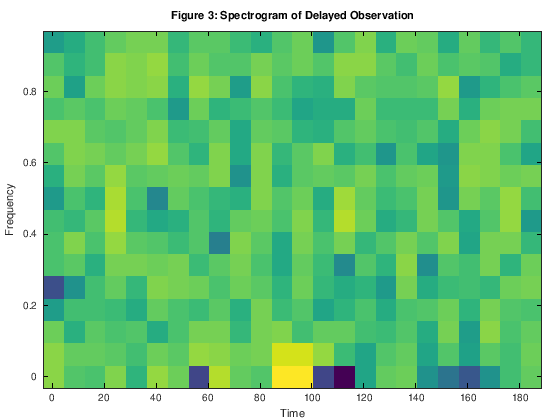

In [16]:
specgram(v(lag:lag+length(g)), 32)
title("Figure 3: Spectrogram of Delayed Observation")

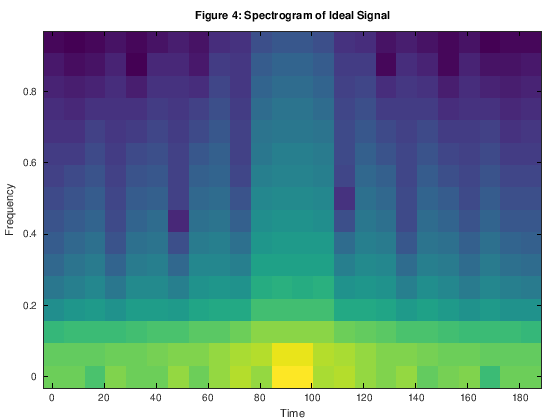

In [15]:
specgram(g, 32)
title("Figure 4: Spectrogram of Ideal Signal")